In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [24]:
bank_full_original = pd.read_csv("../Data/bank-additional-full.csv", sep = ';')

In [25]:
bank = bank_full_original.copy()

In [26]:
bank is bank_full_original

False

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

<Figure size 600x500 with 0 Axes>

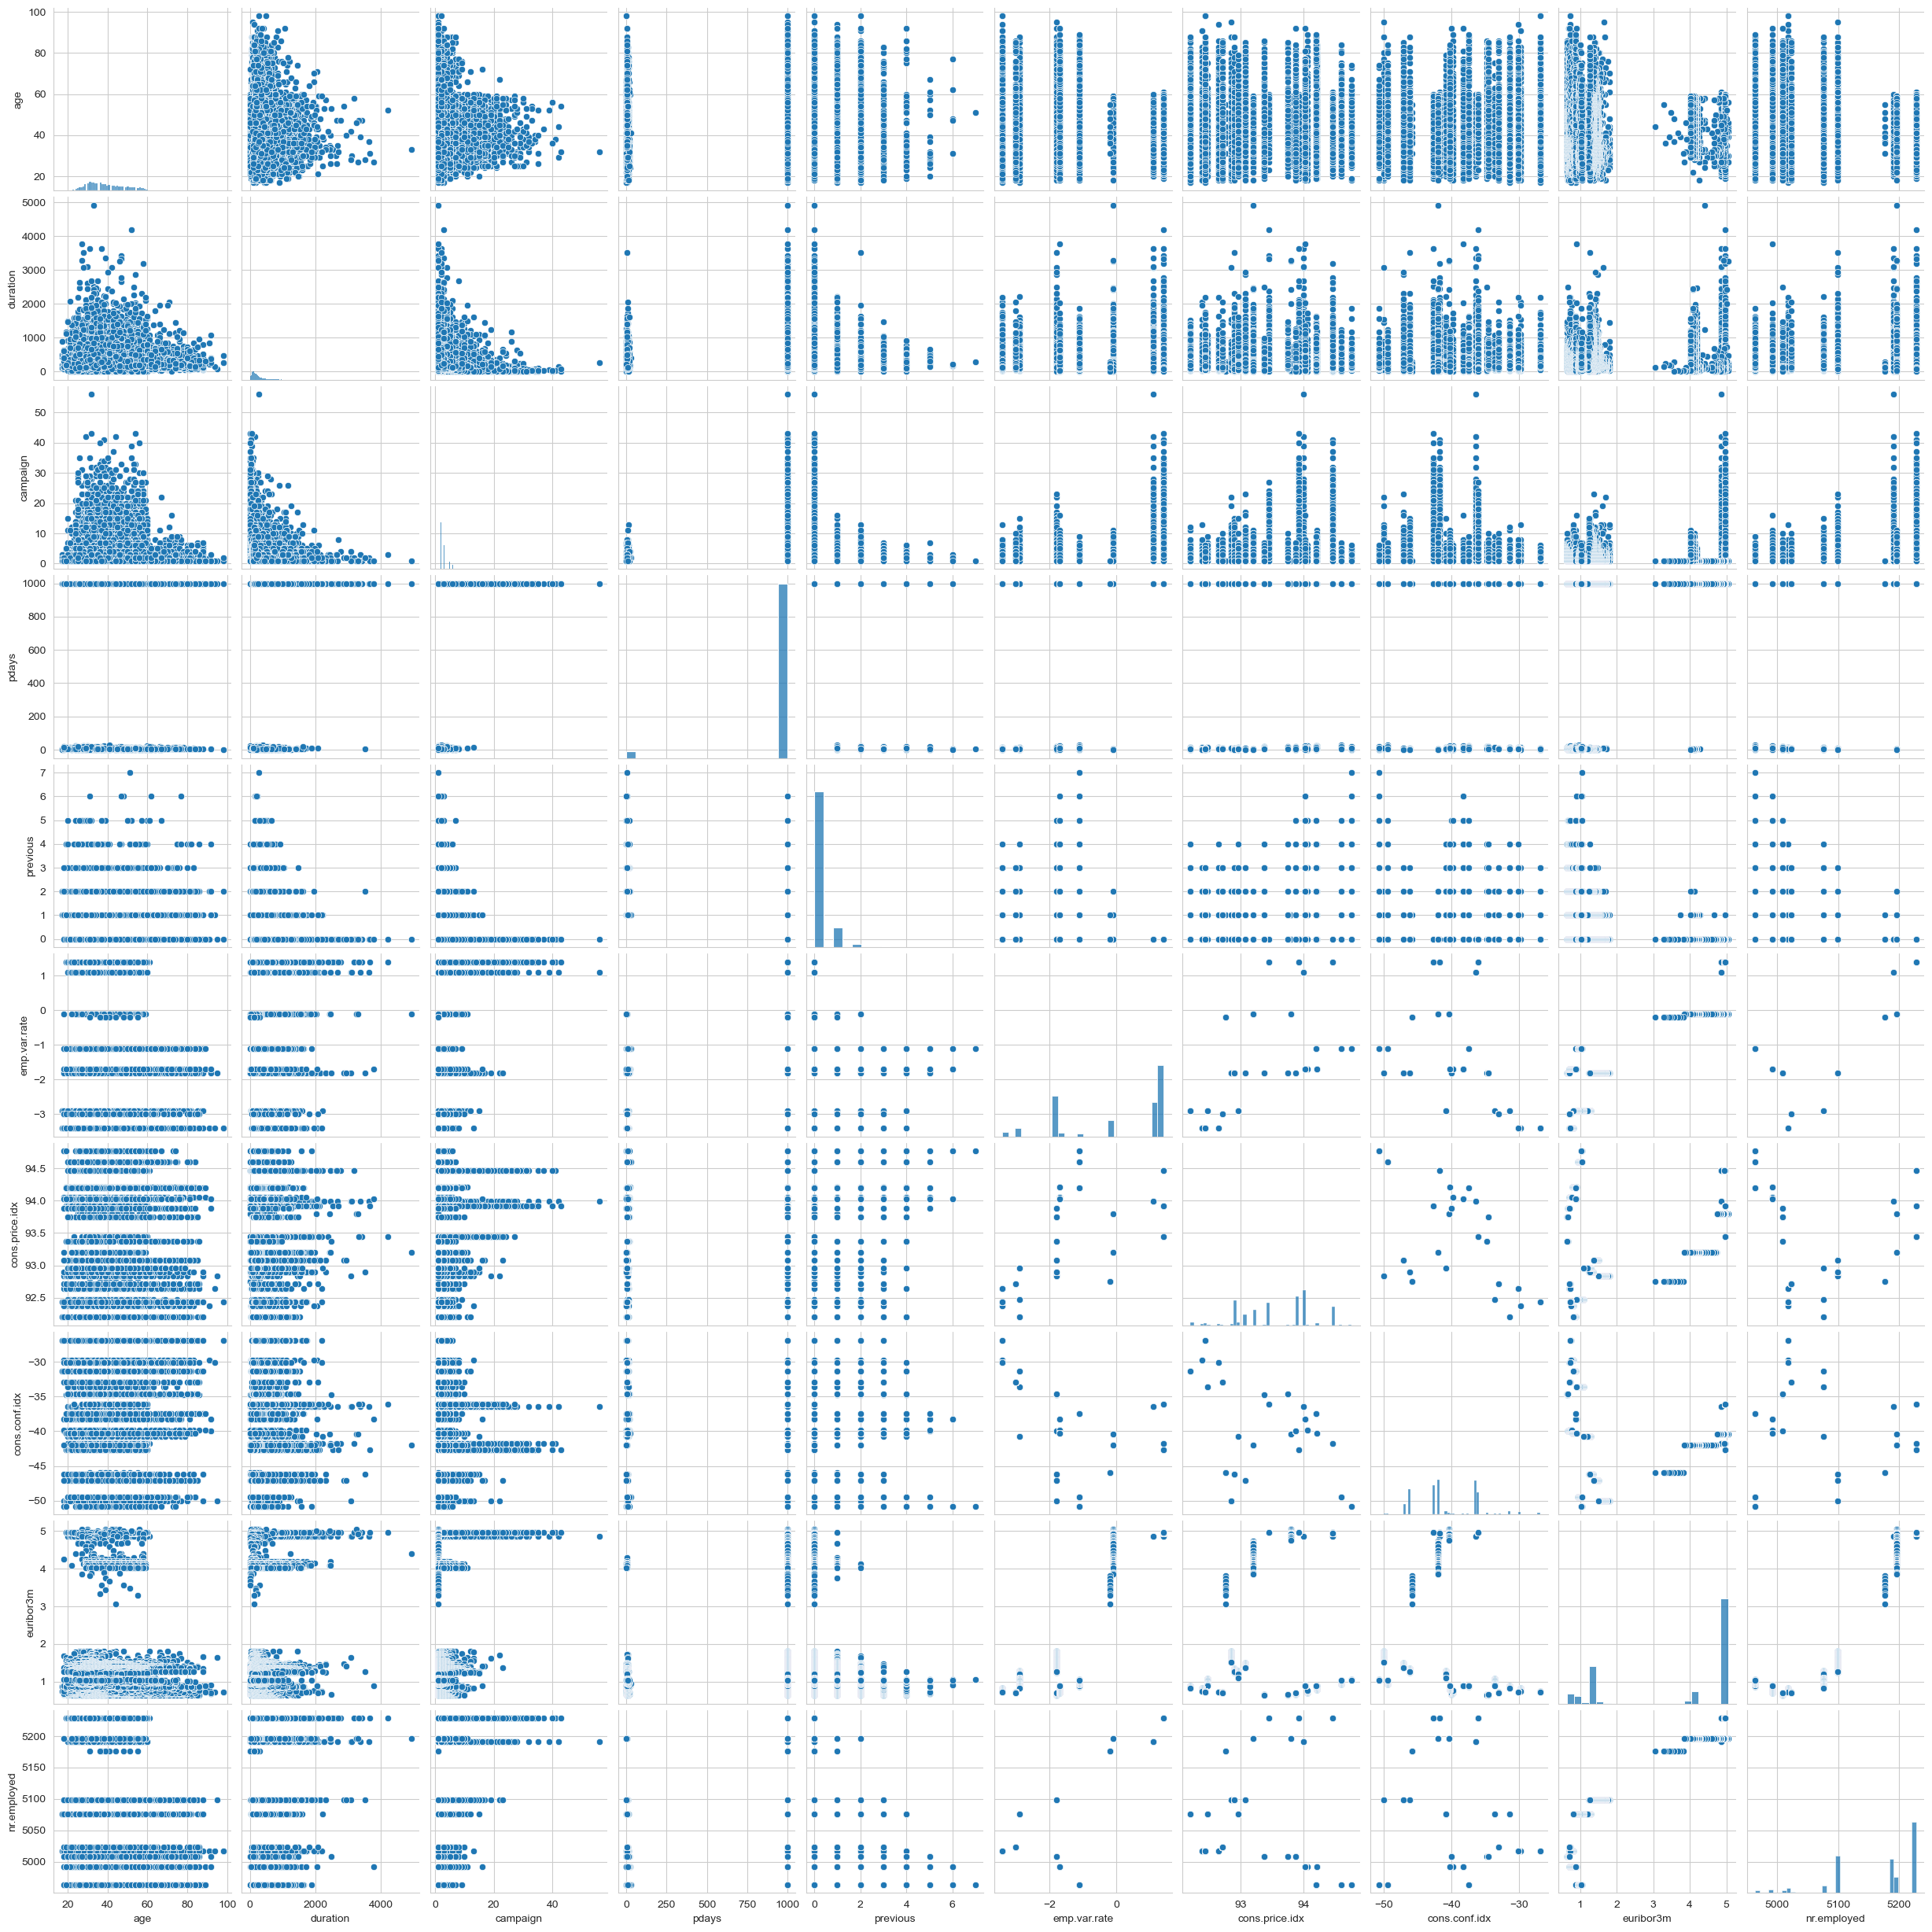

In [7]:
plt.figure(figsize = (6,5))

sns.pairplot(data = bank)

plt.show()

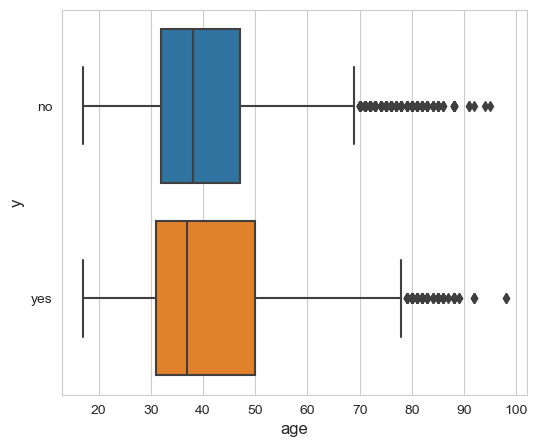

In [10]:
plt.figure(figsize=(6,5))

sns.boxplot(data = bank,
               y = 'y',
               x = 'age')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("age", fontsize=12)

plt.show()

In [29]:
bank.age.value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [30]:
bank.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

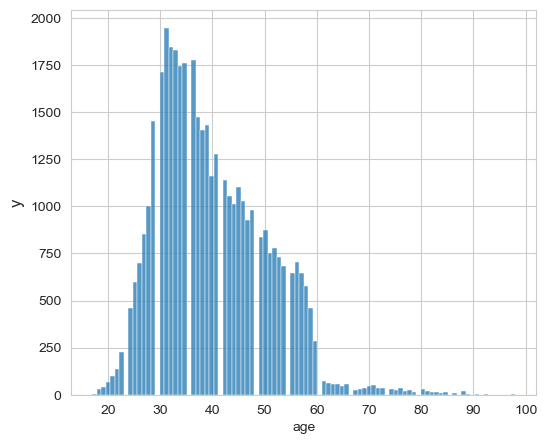

In [5]:
plt.figure(figsize=(6,5))

sns.histplot(data = bank,
               x = 'age')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)


plt.show()

In [21]:
bank.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

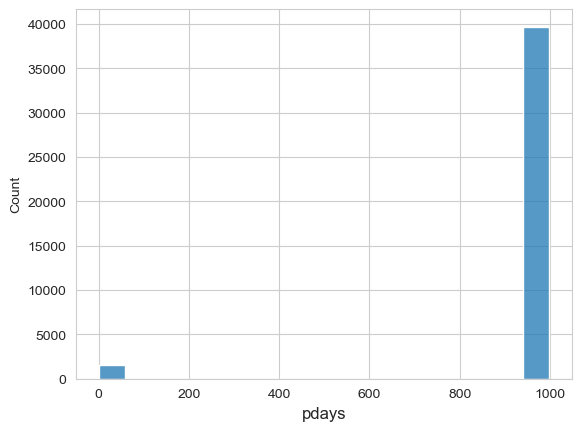

In [6]:
sns.histplot(data = bank,
               x = 'pdays')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


plt.xlabel("pdays", fontsize=12)

plt.show()

In [15]:
bank.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Here we see that $96.32\% = 39673/41188$ of the people contacted were new. I don't think we should change these to Nan and then impute them. Rather, I think we could make this a categorigal value by binning everything as: 1 week, 2 weeks, 3 weeks, never. This this preserves the ability to go back and segment how well the direct marketing campaign was on each group. What are your thoughts?

In [43]:
def label_pdays(day: int )->str:
    if day == 999:
        return "never"
    elif 0<= day <= 3:
        return "first_4"
    elif 3 < day <= 7:
        return "second_4"
    else:
        return "rest"

In [44]:
label_pdays(99)

'rest'

In [45]:
label_pdays(999)

'never'

In [46]:
label_pdays(0)

'first_4'

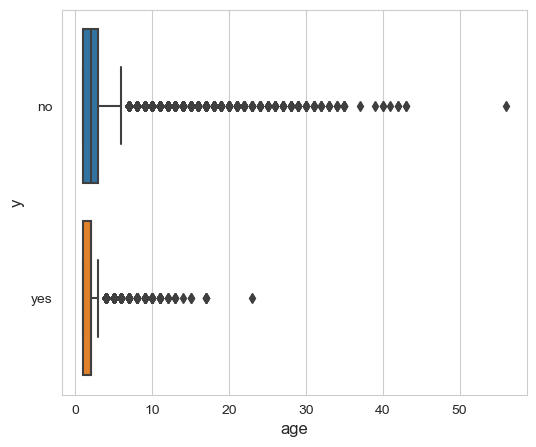

In [15]:
plt.figure(figsize=(6,5))

sns.boxplot(data = bank,
               y = 'y',
               x = 'campaign')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("age", fontsize=12)

plt.show()

In [22]:
bank.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

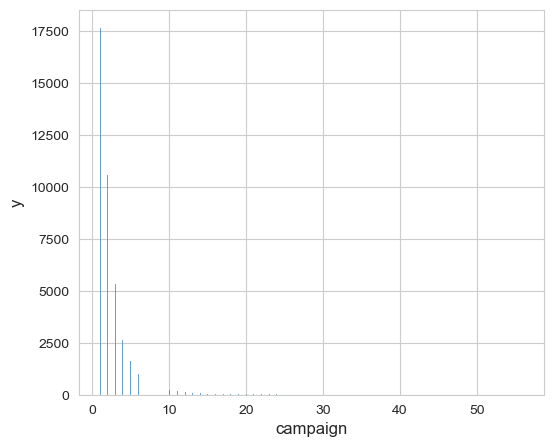

In [46]:
plt.figure(figsize=(6,5))

sns.histplot(data = bank,
               x = 'campaign')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("campaign", fontsize=12)

plt.show()

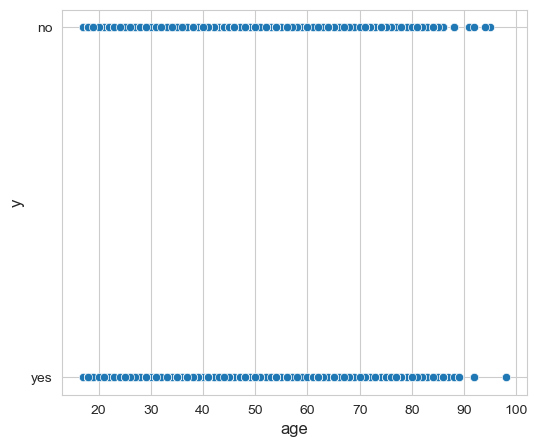

In [17]:
plt.figure(figsize=(6,5))

sns.scatterplot(data = bank,
               y = 'y',
               x = 'age')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("age", fontsize=12)

plt.show()

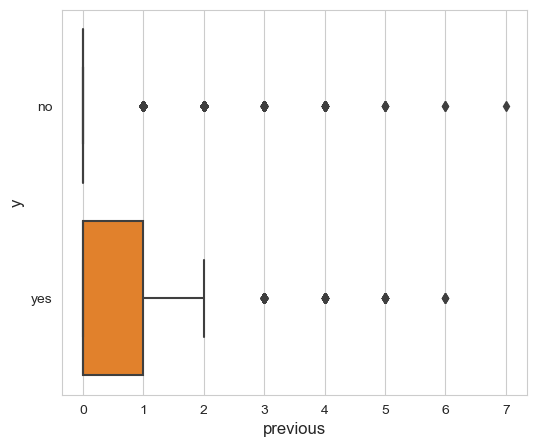

In [20]:
plt.figure(figsize=(6,5))

sns.boxplot(data = bank,
               y = 'y',
               x = 'previous')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("previous", fontsize=12)

plt.show()

In [23]:
bank.previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

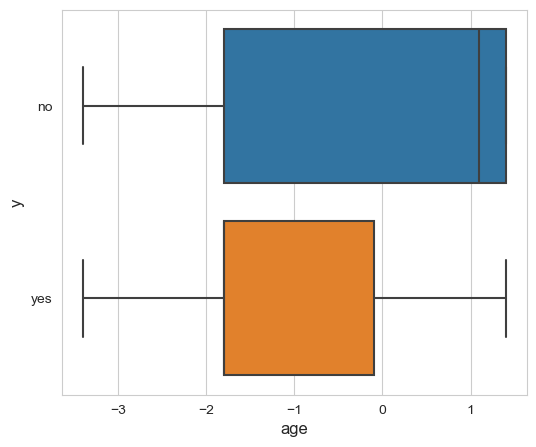

In [24]:
plt.figure(figsize=(6,5))

sns.boxplot(data = bank,
               y = 'y',
               x = 'emp.var.rate')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("y", fontsize=12)
plt.xlabel("age", fontsize=12)

plt.show()

In [27]:
bank.rename(columns = {"emp.var.rate": 'emp_var_rate', "cons.price.idx":"cons_price_idx", "cons.conf.idx":'cons_conf_idx', "nr.employed":'nr_employed'})

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [34]:
bank['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [29]:
bank.euribor3m.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [41]:
bank['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [43]:
bank['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [48]:
bank['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [49]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


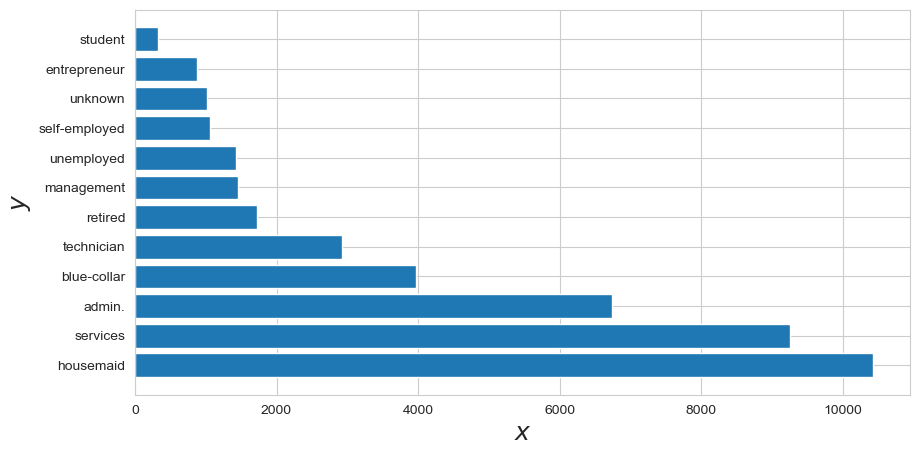

In [50]:
plt.figure(figsize=(10,5))

plt.barh(bank.job.unique(), bank.job.value_counts())

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

In [51]:
bank_clean = bank.drop(['duration'], axis = 1)

# Remove outliers before this next section

## This section labels the no/yes variables to better track the outcomes of the variables ``default'', "housing", and "loan"

In [52]:
bank_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [53]:
def label_yes_no_housing(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_h'

In [54]:
label_yes_no_housing('test')

'test_h'

In [55]:
type(bank['housing'][0])

str

In [56]:
def label_yes_no_default(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_d'

In [57]:
def label_yes_no_loan(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_l'

In [58]:
label_yes_no_default('test')

'test_d'

In [59]:
label_yes_no_loan('test')

'test_l'

In [60]:
bank_clean_test = bank_clean.copy()

In [61]:
bank_clean_test is bank_clean

False

In [62]:
bank_clean_test.loc[:, 'default'] = bank_clean_test.default.apply(label_yes_no_default)

In [63]:
bank_clean_test.loc[:, 'housing'] = bank_clean_test.housing.apply(label_yes_no_housing)

In [64]:
bank_clean_test.loc[:, 'loan'] = bank_clean_test.loan.apply(label_yes_no_loan)

In [65]:
bank_clean_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no_d,no_h,no_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown_d,no_h,no_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no_d,yes_h,no_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no_d,no_h,no_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no_d,no_h,yes_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no_d,yes_h,no_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no_d,yes_h,no_l,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# One-hot encoding Section

In this section we create a dictionary of all the categorical variables we need to one-hot encode to perform the logisitic regression. After creating the dictionary, we loop over this newly created dictionary to perform the one-hot encoding.

In [77]:
categorical_variables = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [80]:
categorical_variables

['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [88]:
for word in categorical_variables:
    bank_feature_word = list(bank[word].unique()).pop(len(bank[word].unique())-1)

In [91]:
del bank_feature_job

In [92]:
del bank_feature_word

In [93]:
del bank_feature_marital

In [97]:
bank_feature_job = list(bank_clean_test['job'].unique())
bank_feature_job.pop(len(bank_clean_test['job'].unique())-1)

'student'

In [98]:
bank_feature_job

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur']

In [99]:
bank_feature_marital = list(bank_clean_test['marital'].unique())
bank_feature_marital.pop(len(bank_clean_test['marital'].unique())-1)

'unknown'

In [100]:
bank_feature_education = list(bank_clean_test['education'].unique())
bank_feature_education.pop(len(bank_clean_test['education'].unique())-1)

'illiterate'

In [101]:
bank_feature_default = ['no_d', 'yes_d']

In [102]:
bank_feature_housing = ['no_h', 'yes_h']

In [103]:
bank_feature_loan = ['no_l', 'yes_l']

In [104]:
bank_feature_contact = list(bank_clean_test['contact'].unique())
bank_feature_contact.pop(len(bank_clean_test['contact'].unique())-1)

'cellular'

In [105]:
bank_feature_month = list(bank_clean_test['month'].unique())
bank_feature_month.pop(len(bank_clean_test['month'].unique())-1)

'sep'

In [106]:
bank_feature_poutcome = list(bank_clean_test['poutcome'].unique())
bank_feature_poutcome.pop(len(bank_clean_test['poutcome'].unique())-1)

'success'

In [110]:
bank_feature_day_of_week = list(bank_clean_test['day_of_week'].unique())
bank_feature_day_of_week.pop(len(bank_clean_test['day_of_week'].unique())-1)

'fri'

In [107]:
bank_feature_housing

['no_h', 'yes_h']

In [108]:
bank_feature_education

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree']

In [111]:
bank_features_train = {'job': bank_feature_job, 'marital': bank_feature_marital, 'education':bank_feature_education, 'default':bank_feature_default, 'housing':bank_feature_housing, 'loan':bank_feature_loan, 'contact':bank_feature_contact, 'month':bank_feature_month, 'day_of_week':bank_feature_day_of_week, 'poutcome':bank_feature_poutcome}

In [117]:
bank_features_train

{'job': ['housemaid',
  'services',
  'admin.',
  'blue-collar',
  'technician',
  'retired',
  'management',
  'unemployed',
  'self-employed',
  'unknown',
  'entrepreneur'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['basic.4y',
  'high.school',
  'basic.6y',
  'basic.9y',
  'professional.course',
  'unknown',
  'university.degree'],
 'default': ['no_d', 'yes_d'],
 'housing': ['no_h', 'yes_h'],
 'loan': ['no_l', 'yes_l'],
 'contact': ['telephone'],
 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu'],
 'poutcome': ['nonexistent', 'failure']}

Trying to write a for loop to do the one-hot encoding all at once.
Here is a sample of how it should work

In [112]:
bank_clean_test_1 = bank_clean_test.copy()

In [114]:
for word in bank_feature_job:
    bank_clean_test_1[word] = pd.get_dummies(bank_clean_test_1['job'])[word]

In [115]:
bank_clean_test_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,services,admin.,blue-collar,technician,retired,management,unemployed,self-employed,unknown,entrepreneur
0,56,housemaid,married,basic.4y,no_d,no_h,no_l,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown_d,no_h,no_l,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,0
2,37,services,married,high.school,no_d,yes_h,no_l,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no_d,no_h,no_l,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no_d,no_h,yes_l,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no_d,yes_h,no_l,cellular,nov,fri,...,0,0,0,0,1,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,...,0,0,1,0,0,0,0,0,0,0
41185,56,retired,married,university.degree,no_d,yes_h,no_l,cellular,nov,fri,...,0,0,0,0,1,0,0,0,0,0
41186,44,technician,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,...,0,0,0,1,0,0,0,0,0,0


In [116]:
bank_clean_test_2 = bank_clean_test.copy()

In [118]:
for k in bank_features_train.keys():
    for v in bank_features_train[k]:
        bank_clean_test_2[v] = pd.get_dummies(bank_clean_test_2[k])[v]

In [121]:
bank_clean_test_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nov,dec,mar,apr,mon,tue,wed,thu,nonexistent,failure
0,56,housemaid,married,basic.4y,no_d,no_h,no_l,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown_d,no_h,no_l,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no_d,yes_h,no_l,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no_d,no_h,no_l,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no_d,no_h,yes_l,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no_d,yes_h,no_l,cellular,nov,fri,...,1,0,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,...,1,0,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no_d,yes_h,no_l,cellular,nov,fri,...,1,0,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no_d,no_h,no_l,cellular,nov,fri,...,1,0,0,0,0,0,0,0,1,0


In [122]:
print(bank_clean_test_2.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'married', 'single', 'divorced', 'basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'no_d', 'yes_d', 'no_h', 'yes_h', 'no_l', 'yes_l', 'telephone', 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'mon', 'tue', 'wed', 'thu', 'nonexistent', 'failure']


In [123]:
len(bank_clean_test_2.columns.tolist())

62

# IT WORKED!

Onto constructing the train-splits and building the actual logistic regression model!

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.model_selection import train_test_split

## Making the split

bank_train, bank_test = train_test_split(bank_clean.copy(),
                                         random_state = 440,
                                         shuffle = True,
                                         test_size = .2, 
                                         stratify = bank['y'])

In [31]:
import statsmodels as sm

In [39]:
from statsmodels.graphics.mosaicplot import mosaic

In [36]:
print(sm.__version__)

0.13.5


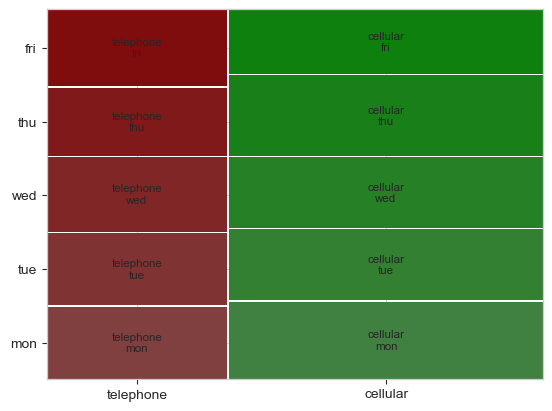

In [42]:
mosaic(bank, ['contact', 'day_of_week'])
plt.show()

# Trying so KNN stuff quickly

In [18]:
def label_yes_no_y(word: str) -> float:
    if word == 'yes':
        return 1
    else:
        return 0

In [22]:
numeric_variables = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]

# Creating the dataframe that is to be used for training

We can use the dictionary from above with the numeric_variables list created above to create a full list of features( in float form). We then can use the list of full features to subset the bank data with all features in numeric form. 

In [19]:
label_yes_no_y('yes')

1

In [20]:
label_yes_no_y('no')

0

In [21]:
label_yes_no_y(7)

0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
bank_train, bank_test = train_test_split(bank, 
                                            random_state=440,
                                            shuffle=True,
                                            test_size=.2,
                                            stratify=bank['y'])

In [11]:
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [15]:
knn_features = bank_train.columns.tolist()
knn_features.remove('duration')
knn_features.remove('y')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(5)

## "fit" the model object
knn.fit(bank_train[knn_features],
           bank_train['y'])

## predict on the training set
knn.predict(iris_train[knn_features])

pred = knn.predict(bank_train[knn_features])

ValueError: could not convert string to float: 'admin.'